
**NOME:** Eduardo Fontes Baltazar da Silveira
---



**Exercício 1**

Analise o código a seguir.
Encontre o help da função *cosine_similarity* e explique brevemente qual informação essa função está fornecendo em relação às palavras "king", "queen", "man", "woman", "apple", "orange".

**Resposta:**

>  Essa função mede a similaridade entre vetores por meio do cálculo do cosseno do ângulo entre eles,quanto maior o valor, mais próximos semanticamente os vetores  são. Pares de palavras como king e queen ou apple e orange devem ter alta similaridade, enquanto pares de palavras de categorias diferentes,como king e apple,devem ter uma similaridade mais baixa.

---

**Exercício 2 (OPCIONAL)**

Tente completar o código abaixo no trecho comentado.

```
# 4. Try to find the word that is most similar to "king" but not "queen".
# (You might need to adjust the embeddings or add more words to get meaningful results)

```





In [ ]:
!pip install --upgrade scipy gensim numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
 # prompt: exercise to practice and understanding word embeddings

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Sample word embeddings (replace with actual embeddings)
word_embeddings = {
    "king": np.array([0.1, 0.2, 0.3]),
    "queen": np.array([0.15, 0.25, 0.35]),
    "man": np.array([0.4, 0.5, 0.6]),
    "woman": np.array([0.45, 0.55, 0.65]),
    "apple": np.array([0.7, 0.8, 0.9]),
    "orange": np.array([0.75, 0.85, 0.95]),
}

def cosine_sim(word1, word2):
  """Calculates cosine similarity between two words."""
  return cosine_similarity([word_embeddings[word1]], [word_embeddings[word2]])[0][0]


# 1. Calculate cosine similarity between "king" and "queen"
similarity_king_queen = cosine_sim("king", "queen")
print(f"Cosine similarity between 'king' and 'queen': {similarity_king_queen}")

# 2. Calculate cosine similarity between "man" and "woman"
similarity_man_woman = cosine_sim("man", "woman")
print(f"Cosine similarity between 'man' and 'woman': {similarity_man_woman}")

# 3. Calculate cosine similarity between "apple" and "orange"
similarity_apple_orange = cosine_sim("apple", "orange")
print(f"Cosine similarity between 'apple' and 'orange': {similarity_apple_orange}")

# 4. Try to find the word that is most similar to "king" but not "queen".
# (You might need to adjust the embeddings or add more words to get meaningful results)




Cosine similarity between 'king' and 'queen': 0.9974149030430577
Cosine similarity between 'man' and 'woman': 0.9998949782076886
Cosine similarity between 'apple' and 'orange': 0.9999823267952279


In [ ]:
#Code for exercise 2:
similar_word = max(
    {word: cosine_sim("king", word) for word in word_embeddings if word != "queen" and word != 'king' },
    key=lambda word: cosine_sim("king", word)
)
print(f"A palavra mais semelhante a 'king' (exceto 'queen') é: {similar_word}")


A palavra mais semelhante a 'king' (exceto 'queen') é: man


**Exercício 3**

Busque na Wikipedia ou pergunte ao ChatGPT o que é o modelo *word2vec*.

Busque na Internet o que é a biblioteca *gensim*

Execute e use o modelo utilizando o trecho de código abaixo.

Altere o código para realizar experimentos com palavras em português.

Explique como esse trecho de código mede similaridade entre palavras e faça comentários sobre seus experimentos.

**Resposta:**

> Word2Vec é um modelo que aprende representações vetoriais de palavras (embeddings) com base nos contextos em que aparecem. Gensim é uma lib de python voltada para PLN e possui como foco principal o trabalho com grandes corpora de texto, e ela oferece ferramentas para treinar modelos de tópicos, obter representações vetoriais de palavras (word embeddings), e realizar operações de similaridade entre textos e palavras.

---


In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors

# Download the pre-trained Word2Vec model (if not already downloaded)
# This might take a while depending on your internet connection
model = api.load('word2vec-google-news-300')

# Function to find similar words with error handling
def encontrar_palavras_semelhantes(palavra, topn=5):
    try:
        similar_words = model.most_similar(palavra, topn=topn)
        print(f"Words similar to '{palavra}': {similar_words}")
    except KeyError:
        print(f"Erro: A palavra '{palavra}' não está presente no vocabulário do modelo.")

# Function to perform analogy with error handling
def calcular_analogia(palavra1, palavra2, palavra3):
    try:
        result = model.most_similar(positive=[palavra1, palavra3], negative=[palavra2], topn=1)
        print(f"'{palavra1}' é para '{palavra2}' assim como '{palavra3}' é para '{result[0][0]}'")
    except KeyError as e:
        print(f"Erro: A palavra '{e.args[0]}' não está presente no vocabulário do modelo.")

# Exercício 1: Encontrar palavras semelhantes
encontrar_palavras_semelhantes('rei')

# Exercício 2: Calcular analogia (exemplo: "rei - homem + mulher = ?")
calcular_analogia('rei', 'homem', 'mulher')


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Words similar to 'rei': [('sola', 0.6431205868721008), ('quam', 0.6390246748924255), ('ili', 0.6282787322998047), ('esse', 0.6265628337860107), ('huwa', 0.6260662078857422)]
Erro: A palavra 'Key 'mulher' not present in vocabulary' não está presente no vocabulário do modelo.


In [ ]:
#erro:modelo não reconhece palavras em português,usaremos então o bert em português

In [ ]:
# Instalar as bibliotecas necessárias
!pip install transformers
!pip install torch
!pip install -U scikit-learn


In [ ]:
# Carregando o Bert e importando o que for necessário
from transformers import AutoModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import torch

model_name = "neuralmind/bert-base-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
# Dicionário com palavras que serão utilizadas.
palavras = ["rei", "rainha", "homem", "mulher", "maçã", "laranja"]

# Tokenizar e gerar embeddings
inputs = tokenizer(palavras, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)

# Extrair a última camada oculta e calcular a média para obter um embedding único para cada palavra
embeddings = outputs.last_hidden_state.mean(dim=1)

# Calcular a similaridade de cosseno entre os embeddings
similarity_matrix = cosine_similarity(embeddings)
print("Matriz de Similaridade de Cosseno:\n", similarity_matrix)

# Mostrar palavras mais semelhantes para "rei"
indice_palavra = 0  # Índice para "rei"
similaridades = similarity_matrix[indice_palavra]
indices_ordenados = np.argsort(similaridades)[::-1][1:]  # Exclui a própria palavra "rei"

print(f"\nPalavras mais semelhantes a '{palavras[indice_palavra]}':")
for idx in indices_ordenados[:5]:
    print(f"{palavras[idx]}: Similaridade = {similaridades[idx]:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Matriz de Similaridade de Cosseno:
 [[0.99999994 0.8747158  0.7400385  0.6290222  0.38386202 0.64261675]
 [0.8747158  1.         0.7406788  0.7191617  0.4982796  0.7634621 ]
 [0.7400385  0.7406788  0.9999999  0.87395006 0.4490557  0.6390593 ]
 [0.6290222  0.7191617  0.87395006 0.9999999  0.45040813 0.60913205]
 [0.38386202 0.4982796  0.4490557  0.45040813 1.0000002  0.7111326 ]
 [0.64261675 0.7634621  0.6390593  0.60913205 0.7111326  1.        ]]

Palavras mais semelhantes a 'rei':
rainha: Similaridade = 0.8747
homem: Similaridade = 0.7400
laranja: Similaridade = 0.6426
mulher: Similaridade = 0.6290
maçã: Similaridade = 0.3839


**Exercício 4**

Busque na Wikipedia ou pergunte ao ChatGPT o que é o modelo *GloVe*.

Execute e use o modelo utilizando o trecho de código abaixo.

Altere o código para realizar experimentos com palavras em português.

Explique como esse trecho de código mede similaridade entre palavras e faça comentários sobre seus experimentos.

**Resposta:**

> GloVe é um modelo de embeddings que mapeia palavras para vetores com base na coocorrência(frequência com que duas palavras aparecem juntas em um determinado contexto) em grandes volumes de texto.

---

In [ ]:
# Download the pre-trained GloVe model (if not already downloaded)
model = api.load('glove-wiki-gigaword-50')

# Function to calculate cosine similarity
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Exercise: Solve the analogy: "king" is to "man" as "queen" is to ?
king = model['king']
man = model['man']
queen = model['queen']

# Calculate the vector analogy: queen - king + man
result_vector = queen - king + man

# Find the word with the highest cosine similarity to the result vector
max_similarity = -1
most_similar_word = ''
for word in model.index_to_key:
    if word not in ['king', 'man', 'queen']:  # Exclude the input words
        similarity = cosine_similarity(result_vector, model[word])
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar_word = word

print(f"'King' is to 'man' as 'queen' is to '{most_similar_word}'")

[==================================================] 100.0% 66.0/66.0MB downloaded
'King' is to 'man' as 'queen' is to 'woman'


In [ ]:
#carregaremos o  modelo em inglês e utilizaremos tradução de palavras em português pro inglês para podermos aplicar o modelo

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

# Dicionário de traduções
traducao_palavras = {
    "rei": "king",
    "rainha": "queen",
    "homem": "man",
    "mulher": "woman",
    "maçã": "apple",
    "laranja": "orange"
}
# Inverso para a tradução
traducao_inversa = {v: k for k, v in traducao_palavras.items()}

# Carregar o modelo
def carregar_modelo_glove():
    return api.load('glove-wiki-gigaword-50')

# Função para realizar a analogia com restrição e traduzir o resultado de volta
def calcular_analogia(model, palavra1_pt, palavra2_pt, palavra3_pt):
    # Traduzir palavras para inglês
    palavra1_en = traducao_palavras[palavra1_pt]
    palavra2_en = traducao_palavras[palavra2_pt]
    palavra3_en = traducao_palavras[palavra3_pt]

    vetor_resultante = model[palavra1_en] - model[palavra2_en] + model[palavra3_en]

    # Encontrar a palavra mais semelhante
    resultado = model.similar_by_vector(vetor_resultante, topn=5)
    for palavra_en, _ in resultado:
        if palavra_en not in [palavra1_en, palavra2_en, palavra3_en]:
            # Traduzir o resultado de volta para PT
            palavra_pt = traducao_inversa.get(palavra_en, palavra_en)
            return f"'{palavra1_pt}' é para '{palavra2_pt}' assim como '{palavra3_pt}' é para '{palavra_pt}'"

    return "Nenhuma palavra relevante encontrada."

# Função para calcular a matriz de similaridade
def calcular_matriz_similaridade(model, palavras_pt):
    palavras_en = [traducao_palavras[p] for p in palavras_pt]
    embeddings = np.array([model[palavra] for palavra in palavras_en])
    matriz_similaridade = cosine_similarity(embeddings)


    print("\nMatriz de Similaridade de Cosseno entre palavras:")
    for i, palavra1 in enumerate(palavras_pt):
        for j, palavra2 in enumerate(palavras_pt):
            print(f"Similaridade entre '{palavra1}' e '{palavra2}': {matriz_similaridade[i][j]:.4f}")

# Função principal para executar o exemplo completo
def executar_exemplo():
    model = carregar_modelo_glove()

    # Exemplo de analogia
    resultado_analogia = calcular_analogia(model, "rei", "homem", "mulher")
    print(resultado_analogia)

    # Exemplo de matriz de similaridade
    palavras_pt = ["rei", "rainha", "homem", "mulher", "maçã", "laranja"]
    calcular_matriz_similaridade(model, palavras_pt)

# Executar exemplo
executar_exemplo()



'rei' é para 'homem' assim como 'mulher' é para 'rainha'

Matriz de Similaridade de Cosseno entre palavras:
Similaridade entre 'rei' e 'rei': 1.0000
Similaridade entre 'rei' e 'rainha': 0.7839
Similaridade entre 'rei' e 'homem': 0.5309
Similaridade entre 'rei' e 'mulher': 0.4113
Similaridade entre 'rei' e 'maçã': 0.3047
Similaridade entre 'rei' e 'laranja': 0.2575
Similaridade entre 'rainha' e 'rei': 0.7839
Similaridade entre 'rainha' e 'rainha': 1.0000
Similaridade entre 'rainha' e 'homem': 0.5367
Similaridade entre 'rainha' e 'mulher': 0.6003
Similaridade entre 'rainha' e 'maçã': 0.2042
Similaridade entre 'rainha' e 'laranja': 0.4058
Similaridade entre 'homem' e 'rei': 0.5309
Similaridade entre 'homem' e 'rainha': 0.5367
Similaridade entre 'homem' e 'homem': 1.0000
Similaridade entre 'homem' e 'mulher': 0.8860
Similaridade entre 'homem' e 'maçã': 0.2486
Similaridade entre 'homem' e 'laranja': 0.3422
Similaridade entre 'mulher' e 'rei': 0.4113
Similaridade entre 'mulher' e 'rainha': 0

**Exercício 5**

Analise o código abaixo que utiliza a biblioteca *transformers* do Hugging Face.

Realize experimentos com palavras em português.

Registre comentários sobre seus experimentos.

**Resposta:**

> Para realizar a análise, primeiro, geramos os embeddings de cada palavra, que representam as posições espaciais de cada uma em um espaço de alta dimensionalidade (hiperplano). Como a representação do modelo se dá em um espaço de muitas dimensões, usamos o PCA (Análise de Componentes Principais), uma técnica de aprendizado não supervisionado, para reduzir esses embeddings para 3 dimensões. Embora essa redução cause uma perda inevitável de informações, ela permite visualizar a relação entre as palavras de forma mais acessível. Ao plotar o gráfico, observamos que palavras ou frases com significados semelhantes tendem a estar próximas umas das outras, evidenciando que o modelo identifica o contexto semântico entre elas por meio da distância euclidiana no hiperplano de alta dimensionalidade.

> Em seguida, comparamos dois modelos BERT distintos: o BERTimbau, uma versão adaptada para o português, e o BERT tradicional, pré-treinado em inglês. Nossos experimentos mostraram que o BERT em português tende a colocar frases contextualmente semelhantes em maior proximidade, o que é uma vantagem em termos de entendimento semântico em português. No entanto, ele ainda apresenta dificuldades em capturar todas as nuances contextuais entre certas frases, um fenômeno que poderia se beneficiar de mais dados e ajustes específicos no treinamento.

> Por outro lado, o BERT em inglês se mostrou mais robusto na identificação de similaridades contextuais para uma variedade de frases, mas com uma distância euclidiana maior entre algumas frases semânticamente relacionadas. Esse resultado pode indicar que o modelo em inglês possui maior diversidade contextual, mas talvez sacrifique um pouco da precisão espacial ao representar relações mais próximas.

> É importante ressaltar que este experimento foi limitado em quantidade de frases e no tempo de execução, uma vez que uma análise mais completa requereria um conjunto de dados maior e um poder computacional mais robusto para extrair conclusões abrangentes. Idealmente, mais testes com dados variados poderiam validar melhor esses comportamentos observados. Com isso, uma maior amostragem poderia mostrar com mais clareza as capacidades e limitações de ambos os modelos no reconhecimento de similaridade semântica em português e inglês.


---

In [ ]:
from transformers import AutoModel, AutoTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Carregar modelo e tokenizer em português
model_name = "neuralmind/bert-base-portuguese-cased"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Definir uma lista de palavras em português para explorar
words = ["rei", "rainha", "homem", "mulher", "maçã", "laranja", "computador", "telefone"]

# Tokenização e geração de embeddings
inputs = tokenizer(words, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    outputs = model(**inputs)

# Extração do último estado oculto e cálculo da média para obter embeddings
embeddings = outputs.last_hidden_state.mean(dim=1)



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)
print("Cosine Similarity Matrix:\n", similarity_matrix)

Cosine Similarity Matrix:
 [[0.99999994 0.8747158  0.7400385  0.6290222  0.38386202 0.64261675
  0.7570522  0.5902745 ]
 [0.8747158  1.         0.7406788  0.7191617  0.4982796  0.7634621
  0.7689288  0.54998577]
 [0.7400385  0.7406788  0.9999999  0.87395006 0.4490557  0.6390593
  0.73916876 0.5600293 ]
 [0.6290222  0.7191617  0.87395006 0.9999999  0.45040813 0.60913205
  0.63842297 0.51569766]
 [0.38386202 0.4982796  0.4490557  0.45040813 1.0000002  0.7111326
  0.4397403  0.36170426]
 [0.64261675 0.7634621  0.6390593  0.60913205 0.7111326  1.
  0.6329498  0.49741137]
 [0.7570522  0.7689288  0.73916876 0.63842297 0.4397403  0.6329498
  1.0000001  0.67249066]
 [0.5902745  0.54998577 0.5600293  0.51569766 0.36170426 0.49741137
  0.67249066 1.0000001 ]]


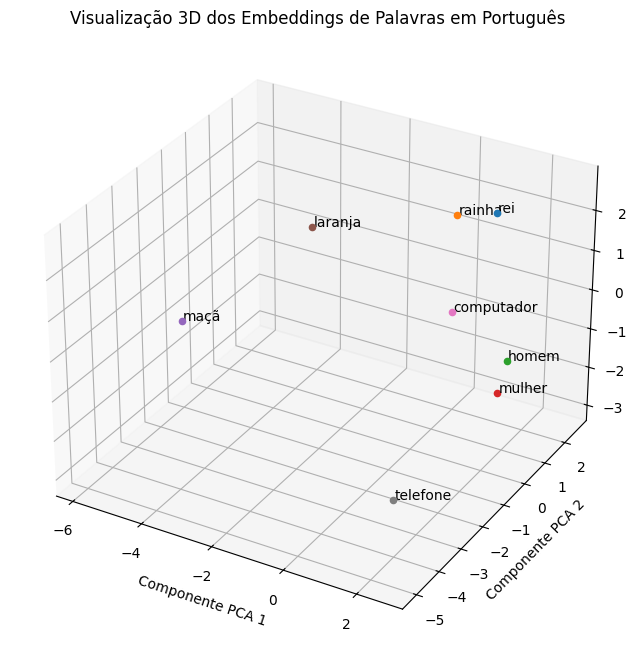

In [ ]:
# Aplicar PCA para reduzir a dimensionalidade para 3 componentes
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Plotagem dos embeddings em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    x, y, z = embeddings_3d[i]
    ax.scatter(x, y, z)
    ax.text(x + 0.02, y + 0.02, z + 0.02, word, fontsize=10)

# Configurações do gráfico
ax.set_title("Visualização 3D dos Embeddings de Palavras em Português")
ax.set_xlabel("Componente PCA 1")
ax.set_ylabel("Componente PCA 2")
ax.set_zlabel("Componente PCA 3")
plt.show()


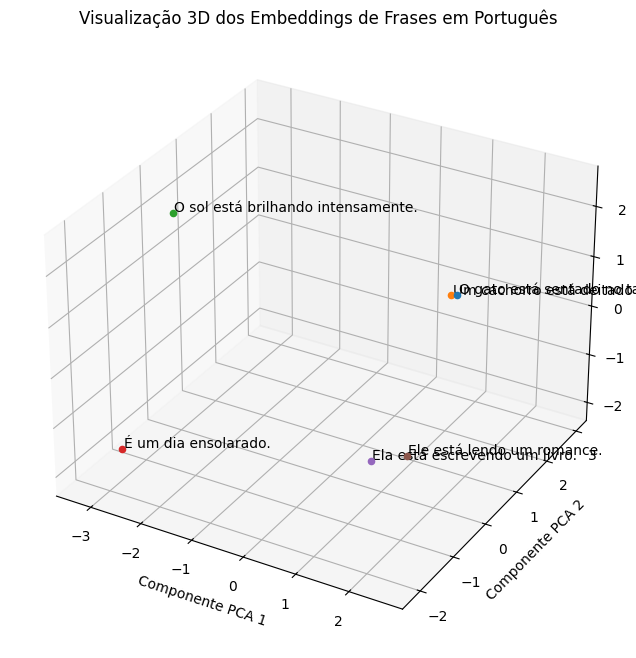

In [ ]:
# Definir frases em português com similaridade semântica
sentences = [
    "O gato está sentado no tapete.",
    "Um cachorro está deitado no tapete.",
    "O sol está brilhando intensamente.",
    "É um dia ensolarado.",
    "Ela está escrevendo um livro.",
    "Ele está lendo um romance."
]

# Tokenização e geração de embeddings para as frases
sentence_inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    sentence_outputs = model(**sentence_inputs)

# Extrair a média do último estado oculto
sentence_embeddings = sentence_outputs.last_hidden_state.mean(dim=1)

# Aplicar PCA para reduzir a dimensionalidade para 3 componentes
pca = PCA(n_components=3)
sentence_embeddings_3d = pca.fit_transform(sentence_embeddings)

# Plotagem dos embeddings de frases em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, sentence in enumerate(sentences):
    x, y, z = sentence_embeddings_3d[i]
    ax.scatter(x, y, z)
    ax.text(x + 0.02, y + 0.02, z + 0.02, sentence, fontsize=10)

# Configurações do gráfico
ax.set_title("Visualização 3D dos Embeddings de Frases em Português")
ax.set_xlabel("Componente PCA 1")
ax.set_ylabel("Componente PCA 2")
ax.set_zlabel("Componente PCA 3")
plt.show()

In [ ]:
# Define a new model and tokenizer
other_model_name = "distilbert-base-uncased"
other_model = AutoModel.from_pretrained(other_model_name)
other_tokenizer = AutoTokenizer.from_pretrained(other_model_name)

# Generate embeddings as before and visualize


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Comparando modelo inglês vs modelo português

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


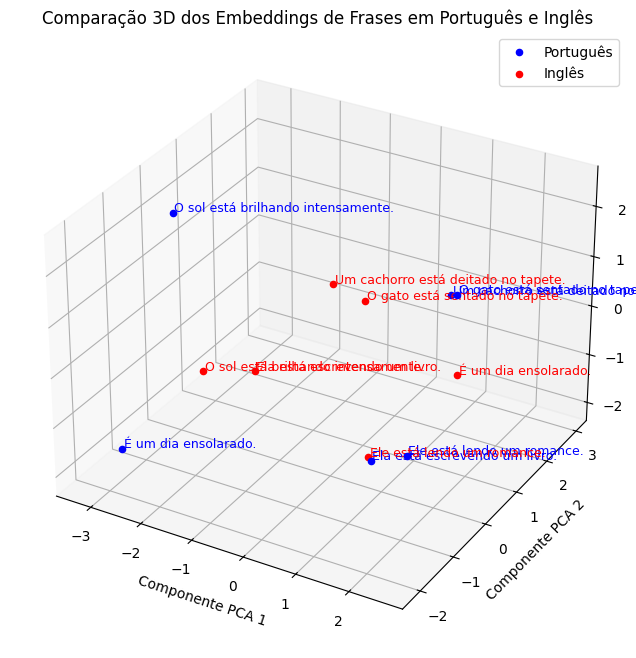

In [ ]:
# Carregar o modelo e tokenizer em português
pt_model_name = "neuralmind/bert-base-portuguese-cased"
pt_model = AutoModel.from_pretrained(pt_model_name)
pt_tokenizer = AutoTokenizer.from_pretrained(pt_model_name)

# Carregar o modelo e tokenizer em inglês
en_model_name = "distilbert-base-uncased"
en_model = AutoModel.from_pretrained(en_model_name)
en_tokenizer = AutoTokenizer.from_pretrained(en_model_name)

# Definir frases em português para análise
sentences = [
    "O gato está sentado no tapete.",
    "Um cachorro está deitado no tapete.",
    "O sol está brilhando intensamente.",
    "É um dia ensolarado.",
    "Ela está escrevendo um livro.",
    "Ele está lendo um romance."
]

# Função para gerar embeddings usando um modelo e tokenizer específicos
def generate_embeddings(model, tokenizer, sentences):
    inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Gerar embeddings para o modelo em português
pt_embeddings = generate_embeddings(pt_model, pt_tokenizer, sentences)

# Gerar embeddings para o modelo em inglês (usando as mesmas frases em português)
en_embeddings = generate_embeddings(en_model, en_tokenizer, sentences)

# Aplicar PCA para reduzir a dimensionalidade para 3D
pca = PCA(n_components=3)
pt_embeddings_3d = pca.fit_transform(pt_embeddings)
en_embeddings_3d = pca.fit_transform(en_embeddings)

# Plotagem dos embeddings em 3D para os dois modelos
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar os embeddings em português
for i, sentence in enumerate(sentences):
    x, y, z = pt_embeddings_3d[i]
    ax.scatter(x, y, z, color="blue", label="Português" if i == 0 else "")
    ax.text(x + 0.02, y + 0.02, z + 0.02, sentence, color="blue", fontsize=9)

# Visualizar os embeddings em inglês (mesmas frases em português)
for i, sentence in enumerate(sentences):
    x, y, z = en_embeddings_3d[i]
    ax.scatter(x, y, z, color="red", label="Inglês" if i == 0 else "")
    ax.text(x + 0.02, y + 0.02, z + 0.02, sentence, color="red", fontsize=9)

# Configurações do gráfico
ax.set_title("Comparação 3D dos Embeddings de Frases em Português e Inglês")
ax.set_xlabel("Componente PCA 1")
ax.set_ylabel("Componente PCA 2")
ax.set_zlabel("Componente PCA 3")
ax.legend()
plt.show()